In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [4]:
from pydantic import BaseModel, Field
from typing import List
import json

In [13]:
from pydantic import BaseModel
from typing import List

class DataItem(BaseModel):
    P: int
    SR: int
    cP: float
    T: int
    SS: float

class DataList(BaseModel):
    data: List[DataItem]


In [14]:
# read data from the data folder
data_folder = Path("__file__").parent / "data"
data_file_name = "data.json"
with open(data_folder / data_file_name, "r") as f:
    json_data = f.read()
# Parse the JSON data
data = json.loads(json_data)

In [15]:
# print keys of the data
print(data.keys())

dict_keys(['HPyBF4_CP', 'HPyBF4_CT', 'HPyBr_CP', 'HPyBr_CT', 'OPyBr_CP', 'BMIMBr_CP_CT', 'BMIMBr_CT'])


In [48]:
class MyPlot:

    def __init__(self):
        self.ils_names: List = []

    def filter_data(self, data, il_name):
        filtered_data = pd.DataFrame(data[il_name])
        return filtered_data

    def group_data(self, filtered_data, group_by_parameter: str = 'T'):
        list_unique = filtered_data[group_by_parameter].unique()
        return list_unique

    def plot_data(
            self,
            data, il_name, grouop_by_parameter: str = 'T',
            x_parameter: str = 'SR', y_parameter: str = 'SS',
            y_axis_log_scale: bool = False,
            legend_units: str = 'F',
            x_axis_label: str = 'SR',
            y_axis_label: str = 'SS',
            maping_dict: dict = None,
            ):

        self.ils_names = list(data.keys())

        filtered_data = self.filter_data(data, il_name)
        list_unique = self.group_data(filtered_data, grouop_by_parameter)

        # fig size
        plt.figure(figsize=(12, 8))
        for case in list_unique:
            # separate data by parameter
            data = filtered_data[filtered_data[grouop_by_parameter] == case]
            plt.plot(data[x_parameter], data[y_parameter], label =f'{grouop_by_parameter} = {case} {legend_units}',
                     marker = 'o', linestyle = '--')
            # legend in the top right corner
            plt.legend(loc='upper right')
            plt.xlabel(x_axis_label)
            plt.ylabel(y_axis_label)
            # font size
            plt.rcParams.update({'font.size': 18})
            # axis font size
            plt.tick_params(axis='both', which='major', labelsize=18)
            if y_axis_log_scale:
                # y axis log scale
                plt.yscale('log')
            plt.title(maping_dict[il_name])
            # make small grid
            plt.grid(True, which="both", ls="-")
        plt.show()


In [49]:
obj = MyPlot()

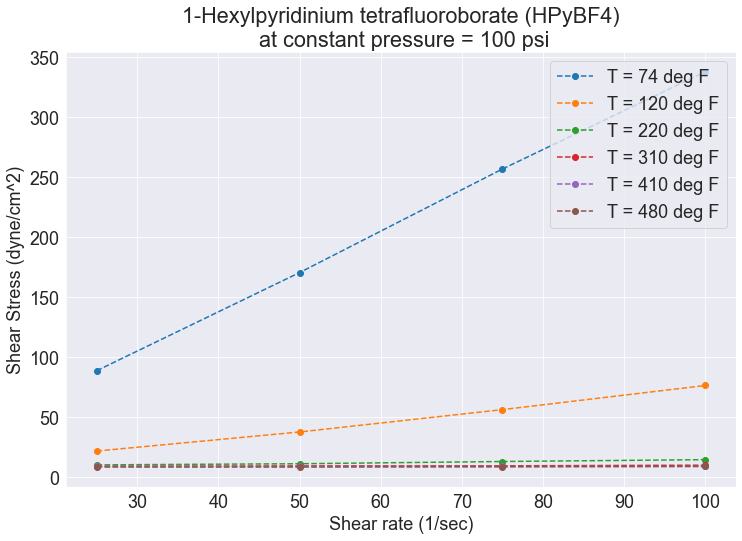

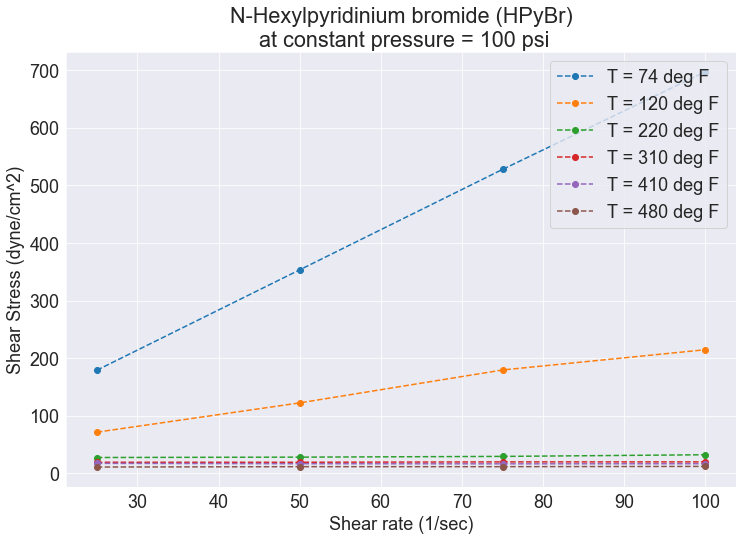

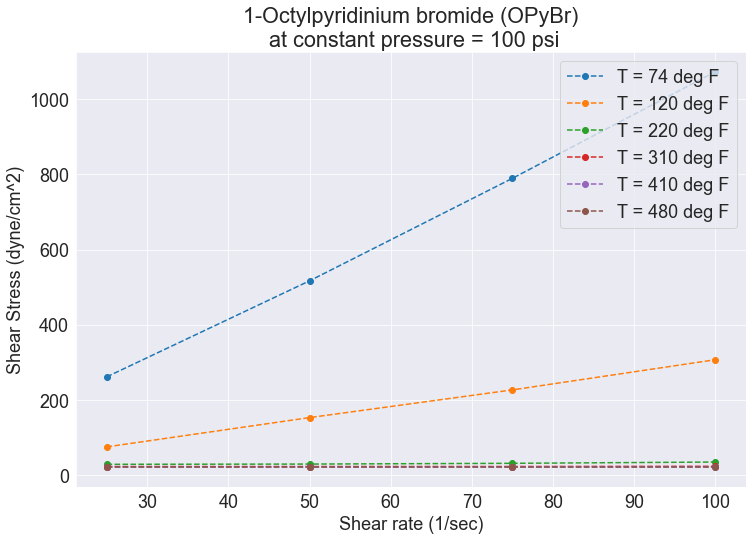

In [50]:
my_list =[
    'HPyBF4_CP',
    # 'HPyBF4_CT',
    'HPyBr_CP',
    # 'HPyBr_CT',
    'OPyBr_CP',
    # 'BMIMBr_CP_CT',
    # 'BMIMBr_CT'
]

mapping_dict = {
    "HPyBF4_CP": "1-Hexylpyridinium tetrafluoroborate (HPyBF4)\n at constant pressure = 100 psi",
    "HPyBr_CP": "N-Hexylpyridinium bromide (HPyBr)\n at constant pressure = 100 psi",
    "OPyBr_CP": "1-Octylpyridinium bromide (OPyBr)\n at constant pressure = 100 psi",
    "HPyBF4_CT": "1-Hexylpyridinium tetrafluoroborate (HPyBF4)\n at constant temperature = 380 deg F",
    "HPyBr_CT": "N-Hexylpyridinium bromide (HPyBr)\n at constant temperature = 380 deg F",
    "BMIMBr_CP_CT": "1-Butyl-3-methylimidazolium bromide (BMIMBr)\n at constant pressure and temperature",
    "BMIMBr_CT": "1-Butyl-3-methylimidazolium bromide (BMIMBr)\n at constant temperature = 380 deg F",
}

for case in my_list:
    obj.plot_data(
    data,
    case,
    grouop_by_parameter='T',
    x_parameter='SR',
    y_parameter='SS',
    legend_units='deg F',
    x_axis_label='Shear rate (1/sec)',
    y_axis_label='Shear Stress (dyne/cm^2)',
    maping_dict=mapping_dict,
)

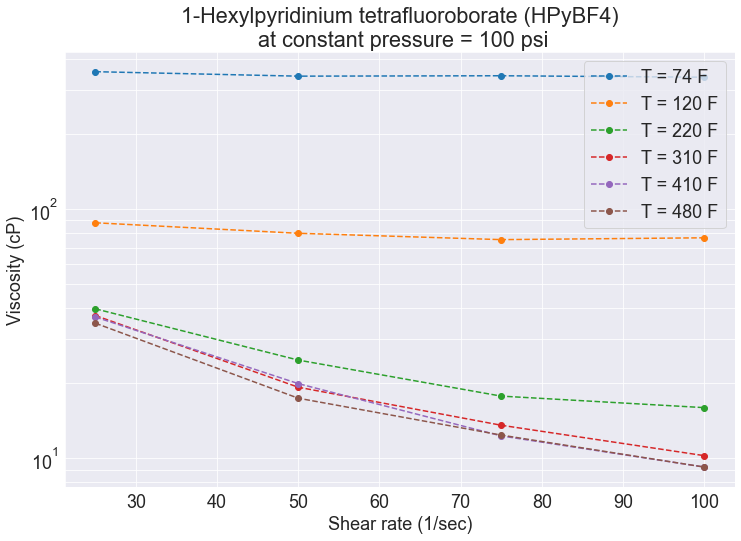

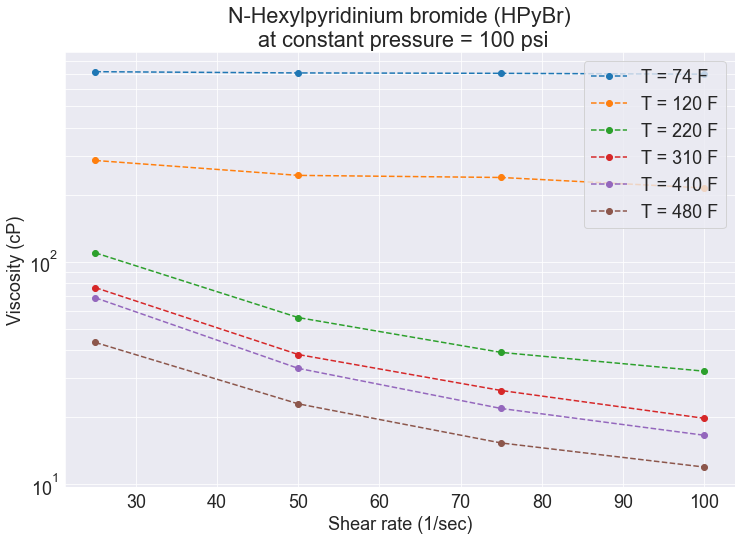

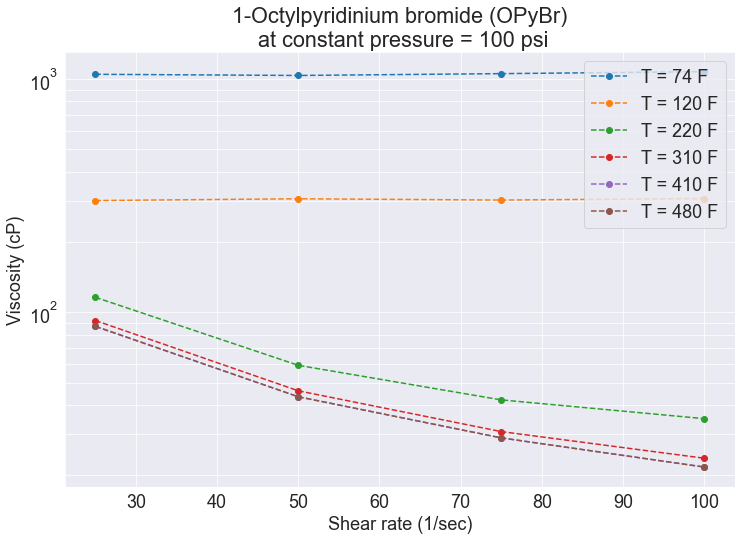

In [51]:
my_list =[
    'HPyBF4_CP',
    # 'HPyBF4_CT',
    'HPyBr_CP',
    # 'HPyBr_CT',
    'OPyBr_CP',
    # 'BMIMBr_CP_CT',
    # 'BMIMBr_CT'
]

for case in my_list:
    obj.plot_data(
    data,
    case,
    grouop_by_parameter='T',
    x_parameter='SR',
    y_parameter='cP',
    y_axis_log_scale=True,
    maping_dict=mapping_dict,
    x_axis_label='Shear rate (1/sec)',
    y_axis_label='Viscosity (cP)',
)

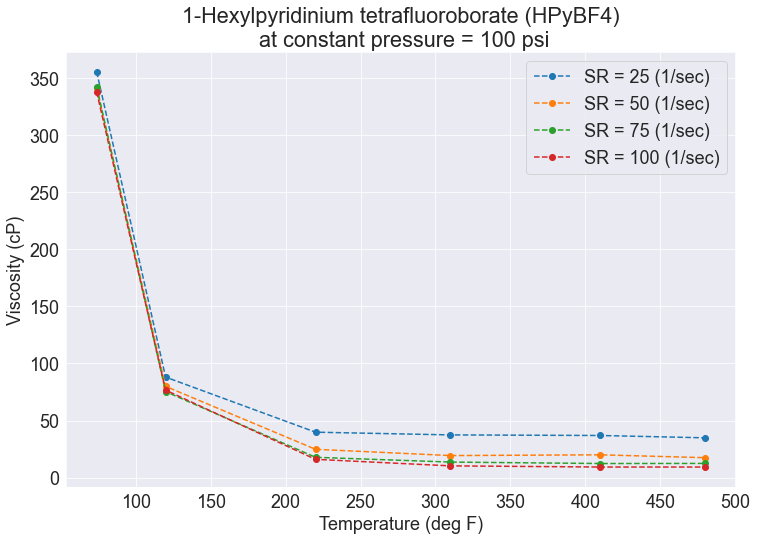

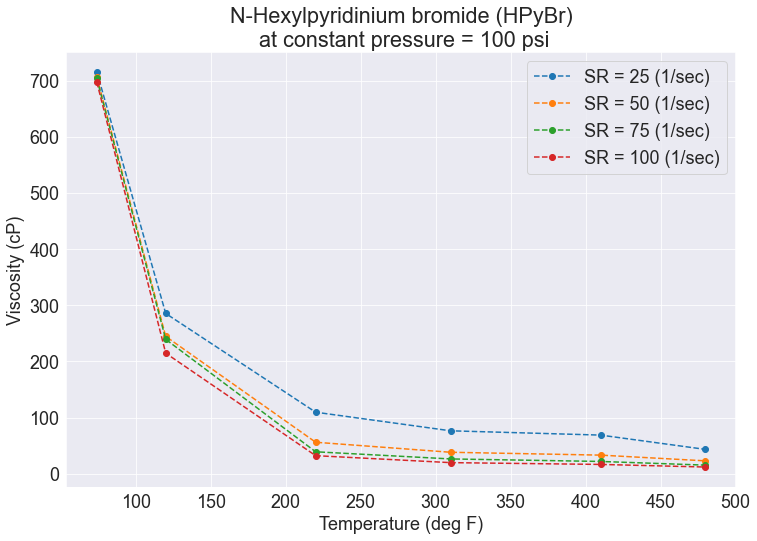

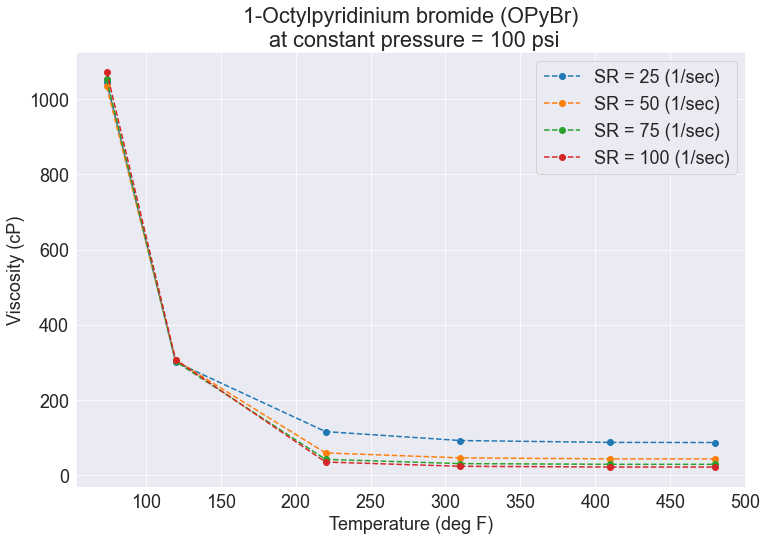

In [53]:
my_list =[
    'HPyBF4_CP',
    # 'HPyBF4_CT',
    'HPyBr_CP',
    # 'HPyBr_CT',
    'OPyBr_CP',
    # 'BMIMBr_CP_CT',
    # 'BMIMBr_CT'
]

for case in my_list:
    obj.plot_data(
    data,
    case,
    grouop_by_parameter='SR',
    x_parameter='T',
    y_parameter='cP',
    y_axis_log_scale=False,
    legend_units='(1/sec)',
    maping_dict=mapping_dict,
    x_axis_label='Temperature (deg F)',
    y_axis_label='Viscosity (cP)',
)

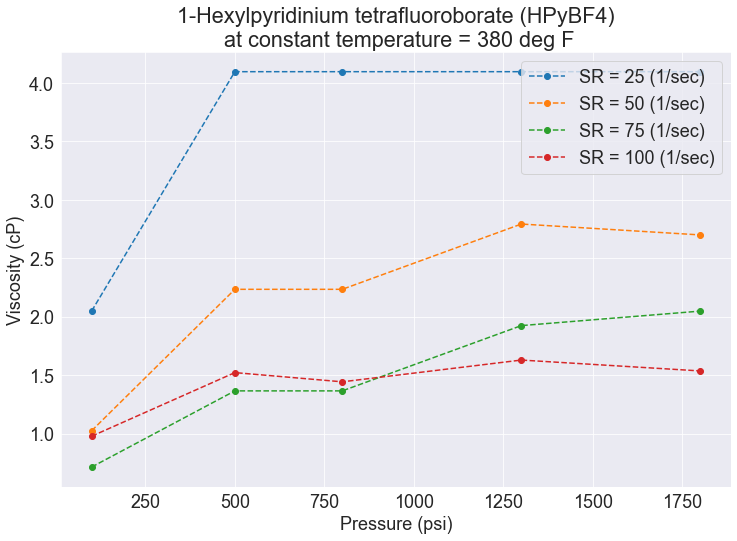

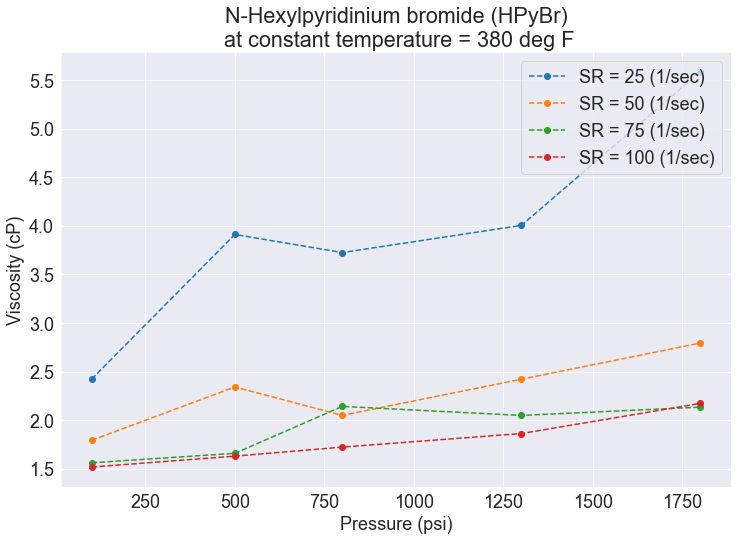

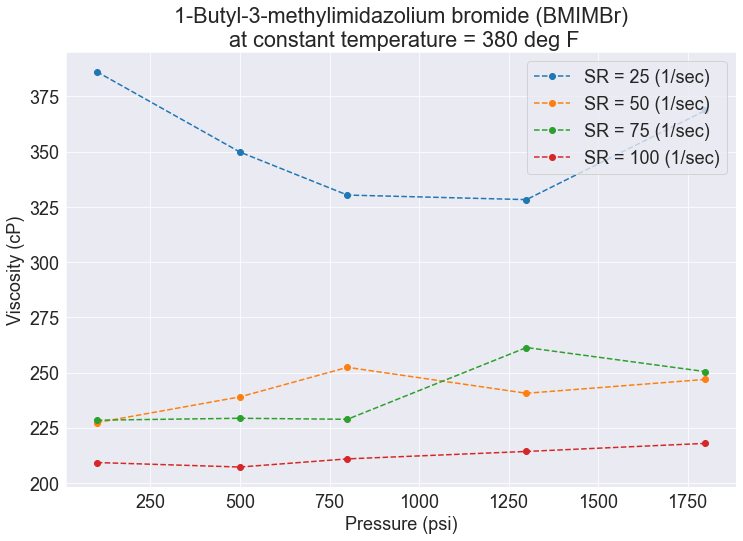

In [54]:
my_list =[
    # 'HPyBF4_CP',
    'HPyBF4_CT',
    # 'HPyBr_CP',
    'HPyBr_CT',
    # 'OPyBr_CP',
    # 'BMIMBr_CP_CT',
    'BMIMBr_CT'
]

for case in my_list:
    obj.plot_data(
    data,
    case,
    grouop_by_parameter='SR',
    x_parameter='P',
    y_parameter='cP',
    y_axis_log_scale=False,
    legend_units='(1/sec)',
    maping_dict=mapping_dict,
    x_axis_label='Pressure (psi)',
    y_axis_label='Viscosity (cP)',
)

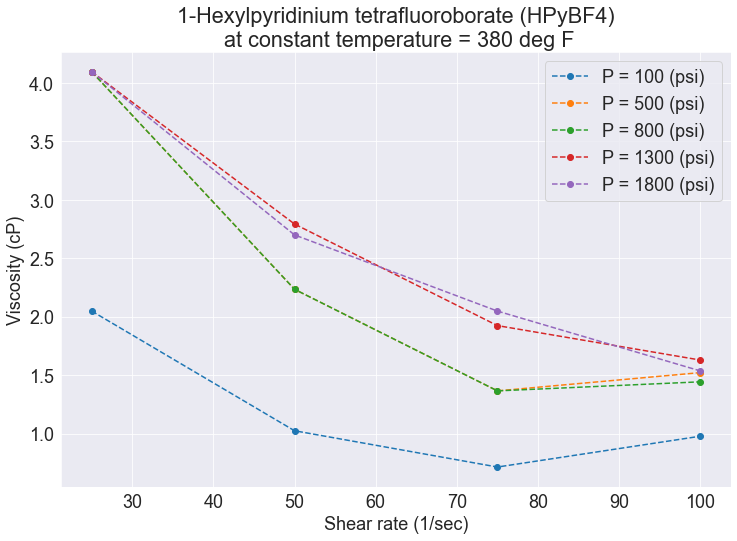

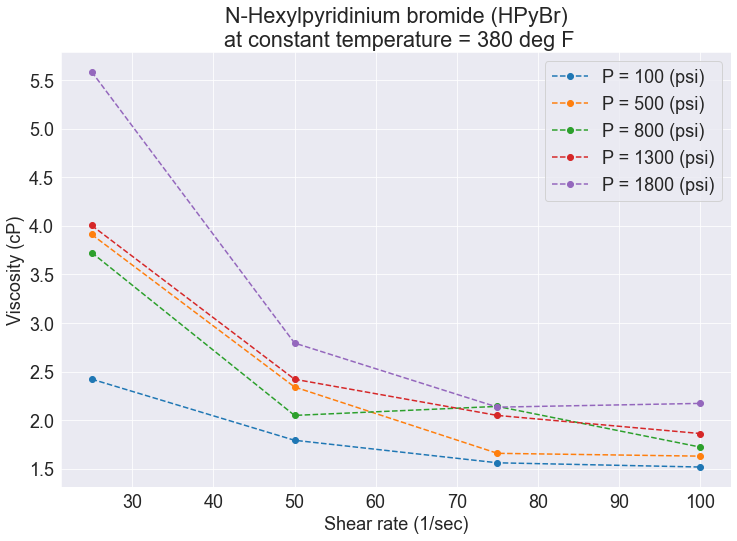

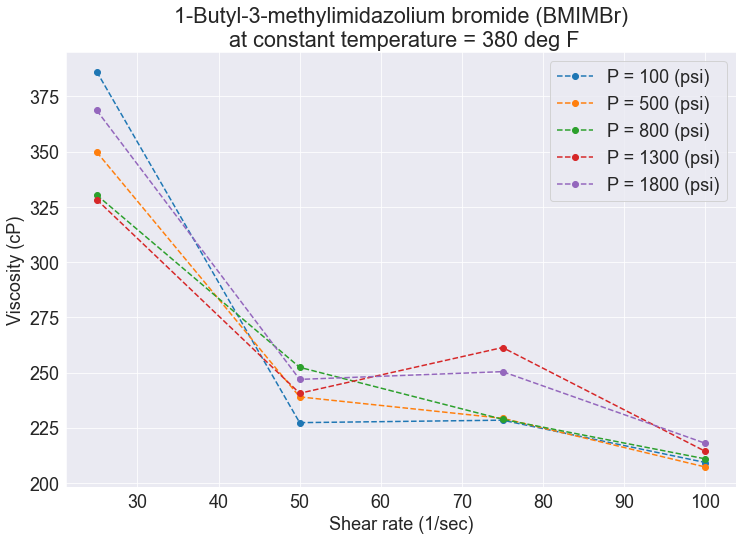

In [55]:
my_list =[
    # 'HPyBF4_CP',
    'HPyBF4_CT',
    # 'HPyBr_CP',
    'HPyBr_CT',
    # 'OPyBr_CP',
    # 'BMIMBr_CP_CT',
    'BMIMBr_CT'
]

for case in my_list:
    obj.plot_data(
    data,
    case,
    grouop_by_parameter='P',
    x_parameter='SR',
    y_parameter='cP',
    y_axis_log_scale=False,
    legend_units='(psi)',
    maping_dict=mapping_dict,
    x_axis_label='Shear rate (1/sec)',
    y_axis_label='Viscosity (cP)',
)

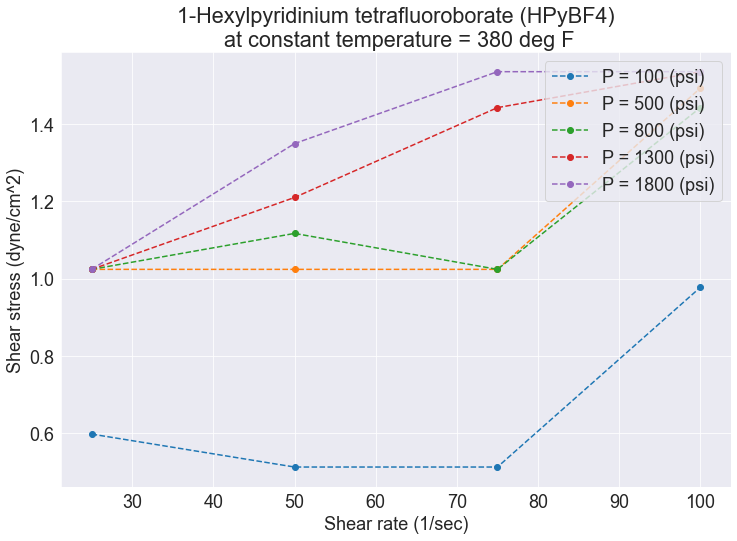

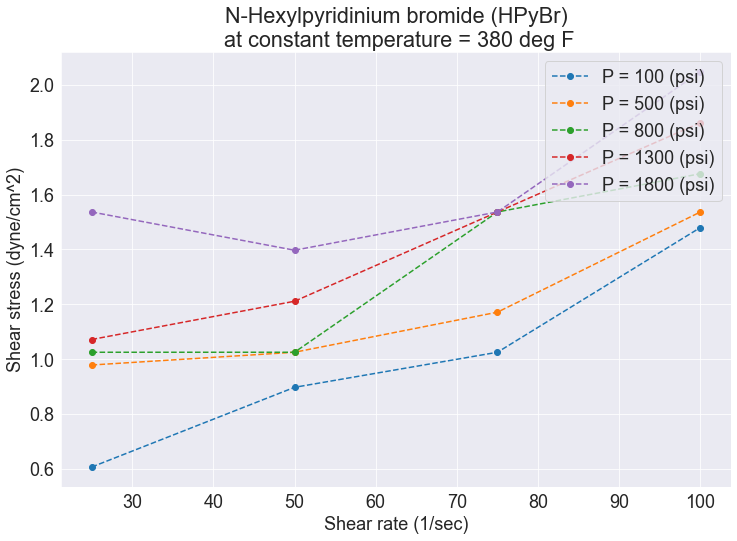

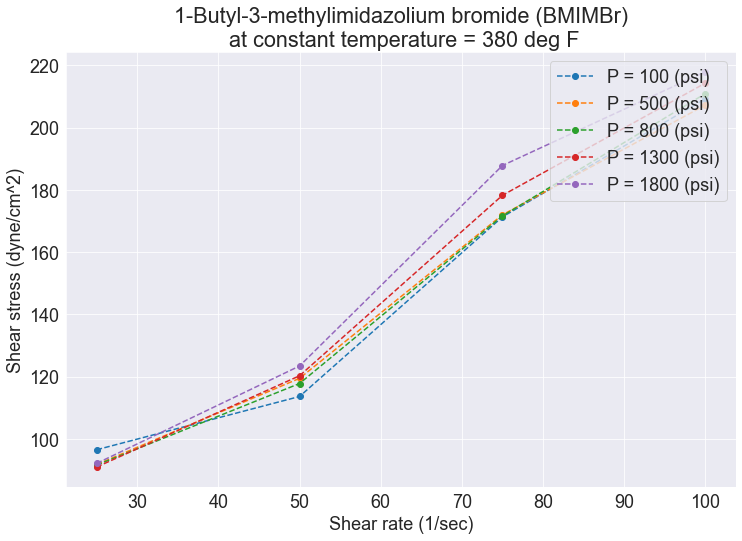

In [56]:
my_list =[
    # 'HPyBF4_CP',
    'HPyBF4_CT',
    # 'HPyBr_CP',
    'HPyBr_CT',
    # 'OPyBr_CP',
    # 'BMIMBr_CP_CT',
    'BMIMBr_CT'
]

for case in my_list:
    obj.plot_data(
    data,
    case,
    grouop_by_parameter='P',
    x_parameter='SR',
    y_parameter='SS',
    y_axis_log_scale=False,
    legend_units='(psi)',
    maping_dict=mapping_dict,
    x_axis_label='Shear rate (1/sec)',
    y_axis_label='Shear stress (dyne/cm^2)',
)